In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
data= pd.read_csv(r'C:\Users\Neeraj\Project of ML\Banking Loan Project\Loan_dataset.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status
0,23002,Male,True,3,Graduate,True,4315,19748.0,60000,300,1,OCR,1
1,23003,Female,True,3,Not Graduate,True,3331,29657.0,20000,60,0,OCR,1
2,23004,Male,True,3,Not Graduate,True,22494,29539.0,30000,240,1,RCR,1
3,23005,Male,True,2,Not Graduate,False,78117,12909.0,20000,60,0,OCR,1
4,23006,Male,False,2,Not Graduate,False,41976,45598.0,60000,300,1,RCR,1


In [4]:
data.shape

(5584, 13)

In [5]:
data.isnull().sum()

Loan_ID                 0
Gender                159
Married               256
Dependent_No            0
Education             366
Self_Employed           0
Applicant_Income        0
CoApplicant_Income    585
Loan_Amount             0
Loan_Amount_Term        0
Credit History          0
Property_District       6
Loan_Status             0
dtype: int64

In [6]:
data.Married.fillna(data.Married.mode()[0],inplace=True)
data.CoApplicant_Income.fillna(data.CoApplicant_Income.median(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status
0,23002,Male,True,3,Graduate,True,4315,19748.0,60000,300,1,OCR,1
1,23003,Female,True,3,Not Graduate,True,3331,29657.0,20000,60,0,OCR,1
2,23004,Male,True,3,Not Graduate,True,22494,29539.0,30000,240,1,RCR,1
3,23005,Male,True,2,Not Graduate,False,78117,12909.0,20000,60,0,OCR,1
4,23006,Male,False,2,Not Graduate,False,41976,45598.0,60000,300,1,RCR,1


In [8]:
data.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependent_No            0
Education             366
Self_Employed           0
Applicant_Income        0
CoApplicant_Income      0
Loan_Amount             0
Loan_Amount_Term        0
Credit History          0
Property_District       6
Loan_Status             0
dtype: int64

In [9]:
data.Education.fillna(data.Education.mode()[0],inplace=True)

In [10]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependent_No          0
Education             0
Self_Employed         0
Applicant_Income      0
CoApplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit History        0
Property_District     6
Loan_Status           0
dtype: int64

In [11]:
data.shape

(5584, 13)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             5584 non-null   int64  
 1   Gender              5584 non-null   object 
 2   Married             5584 non-null   bool   
 3   Dependent_No        5584 non-null   int64  
 4   Education           5584 non-null   object 
 5   Self_Employed       5584 non-null   bool   
 6   Applicant_Income    5584 non-null   int64  
 7   CoApplicant_Income  5584 non-null   float64
 8   Loan_Amount         5584 non-null   int64  
 9   Loan_Amount_Term    5584 non-null   int64  
 10  Credit History      5584 non-null   int64  
 11  Property_District   5578 non-null   object 
 12  Loan_Status         5584 non-null   int64  
dtypes: bool(2), float64(1), int64(7), object(3)
memory usage: 490.9+ KB


In [13]:
data=data.drop(['Loan_ID'],axis=1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5584 non-null   object 
 1   Married             5584 non-null   bool   
 2   Dependent_No        5584 non-null   int64  
 3   Education           5584 non-null   object 
 4   Self_Employed       5584 non-null   bool   
 5   Applicant_Income    5584 non-null   int64  
 6   CoApplicant_Income  5584 non-null   float64
 7   Loan_Amount         5584 non-null   int64  
 8   Loan_Amount_Term    5584 non-null   int64  
 9   Credit History      5584 non-null   int64  
 10  Property_District   5578 non-null   object 
 11  Loan_Status         5584 non-null   int64  
dtypes: bool(2), float64(1), int64(6), object(3)
memory usage: 447.3+ KB


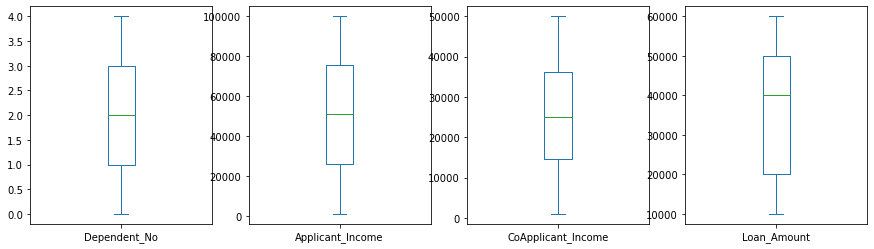

In [15]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
data.Dependent_No.plot(kind='box')
plt.subplot(1,4,2)
data.Applicant_Income.plot(kind='box')
plt.subplot(1,4,3)
data.CoApplicant_Income.plot(kind='box')
plt.subplot(1,4,4)
data.Loan_Amount.plot(kind='box')
plt.show()

In [16]:
data['Self_Employed']=data['Self_Employed'].astype(str)

In [17]:
col=list(data.columns)

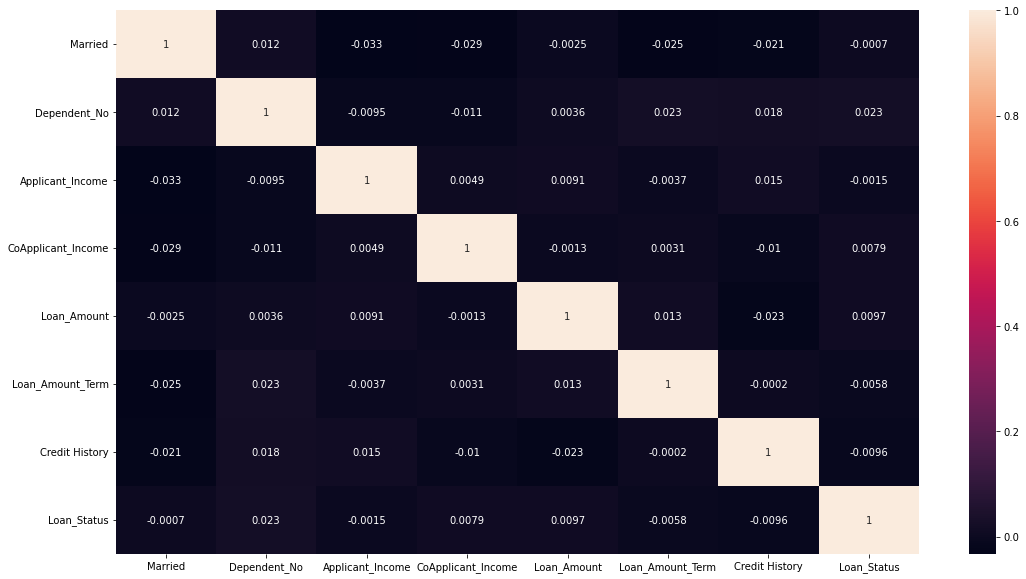

In [18]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [19]:
col_list=[]
for col in data.columns:
    if((data[col].dtypes!=object)&(col!='Loan_Status')):
        col_list.append(col)

In [20]:
col_list

['Married',
 'Dependent_No',
 'Applicant_Income',
 'CoApplicant_Income',
 'Loan_Amount',
 'Loan_Amount_Term',
 'Credit History']

In [21]:
X=data[col_list]

In [22]:
variables = data[[
 'Dependent_No',
 'Applicant_Income',
 'CoApplicant_Income',
 'Loan_Amount',
 'Loan_Amount_Term',
 'Credit History']]

In [23]:
vif = pd.DataFrame()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [26]:
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.712679,Dependent_No
1,3.514181,Applicant_Income
2,3.739200,CoApplicant_Income
3,4.150041,Loan_Amount
4,4.208368,Loan_Amount_Term
5,2.680098,Credit History


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5584 non-null   object 
 1   Married             5584 non-null   bool   
 2   Dependent_No        5584 non-null   int64  
 3   Education           5584 non-null   object 
 4   Self_Employed       5584 non-null   object 
 5   Applicant_Income    5584 non-null   int64  
 6   CoApplicant_Income  5584 non-null   float64
 7   Loan_Amount         5584 non-null   int64  
 8   Loan_Amount_Term    5584 non-null   int64  
 9   Credit History      5584 non-null   int64  
 10  Property_District   5578 non-null   object 
 11  Loan_Status         5584 non-null   int64  
dtypes: bool(1), float64(1), int64(6), object(4)
memory usage: 485.5+ KB


In [31]:
df

NameError: name 'df' is not defined

In [28]:
#df = pd.get_dummies(data, columns = ['Gender','Married','Education','Self_Employed','Property_District'],drop_first=True)

In [32]:
df=data

In [34]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
#df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Married']= label_encoder.fit_transform(df['Married'])
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['Property_District']= label_encoder.fit_transform(df['Property_District'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5584 non-null   object 
 1   Married             5584 non-null   int64  
 2   Dependent_No        5584 non-null   int64  
 3   Education           5584 non-null   int32  
 4   Self_Employed       5584 non-null   int32  
 5   Applicant_Income    5584 non-null   int64  
 6   CoApplicant_Income  5584 non-null   float64
 7   Loan_Amount         5584 non-null   int64  
 8   Loan_Amount_Term    5584 non-null   int64  
 9   Credit History      5584 non-null   int64  
 10  Property_District   5584 non-null   int32  
 11  Loan_Status         5584 non-null   int64  
dtypes: float64(1), int32(3), int64(7), object(1)
memory usage: 458.2+ KB


In [ ]:
df.head()

In [ ]:
data.info()

In [ ]:
df.info()

In [70]:
x=df[['Dependent_No','Education','Credit History']]
y=data['Loan_Status']

In [71]:
#train_X=data[['Gender','Married','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History' ]] ## all the data in X (Train set)
#train_y=Loan_status  ## Loan status will be our Y

In [92]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=45)

In [93]:
print("X train shape", train_X.shape)
print("y train shape", test_X.shape)
print("X test shape",train_y.shape)
print("y test shape", test_y.shape)

X train shape (4467, 3)
y train shape (1117, 3)
X test shape (4467,)
y test shape (1117,)


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [95]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [96]:
scoring='accuracy'

In [97]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [98]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=0, shuffle=True)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

LogisticRegression()
Logistic Regression 0.661301
DecisionTreeClassifier()
Decision Tree 0.661301
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.661301
RandomForestClassifier()
Random Forest 0.661301
SVC()
Support Vector Classifier 0.661301
KNeighborsClassifier()
K- Neirest Neighbour 0.589667
GaussianNB()
Naive Bayes 0.661301


In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:-  0.6911369740376008
[[  0 345]
 [  0 772]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       345
           1       0.69      1.00      0.82       772

    accuracy                           0.69      1117
   macro avg       0.35      0.50      0.41      1117
weighted avg       0.48      0.69      0.56      1117



C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neeraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
LR=LogisticRegression()

In [81]:
LR.fit(train_X,train_y)

LogisticRegression()

In [82]:
pred=LR.predict(test_X)

In [83]:
#Predict Output
predict_train = LR.fit(train_X, train_y).predict(train_X)

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)


# predict the target on the test dataset
predict_test = LR.predict(test_X)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.6633087083053504
accuracy_score on test dataset :  0.6830796777081468
